In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
#Read Data from CSV

url = 'https://raw.githubusercontent.com/gtnahar/Loan/master/clustering.csv?token=AIEU4NLLTG2NXBUNZ3N2LKK7GIQLQ'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    381 non-null    int64  
 1   CoapplicantIncome  381 non-null    float64
 2   LoanAmount         381 non-null    int64  
 3   Loan_Amount_Term   370 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.0 KB


In [ ]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128,360.0
1,3000,0.0,66,360.0
2,2583,2358.0,120,360.0
3,6000,0.0,141,360.0
4,2333,1516.0,95,360.0


In [ ]:
data.count(axis = 0) 

Loan_ID              381
Gender               376
Married              381
Dependents           373
Education            381
Self_Employed        360
ApplicantIncome      381
CoapplicantIncome    381
LoanAmount           381
Loan_Amount_Term     370
Credit_History       351
Property_Area        381
Loan_Status          381
dtype: int64

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

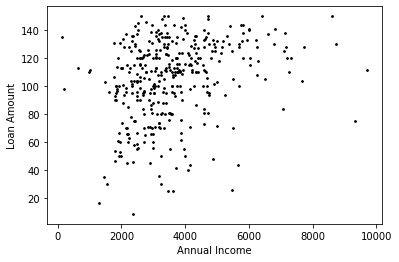

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]

#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black',s=3)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

Let's check for missing values.

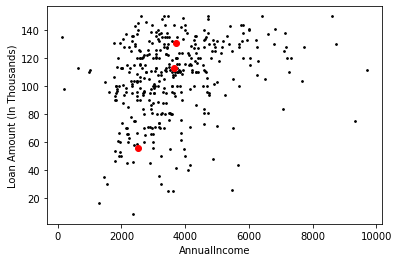

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black',s=3)
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


351.49033056112324
340.7661736513097
192.5313192274416
219.71766746039987
272.946734775831
226.63530232691141
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


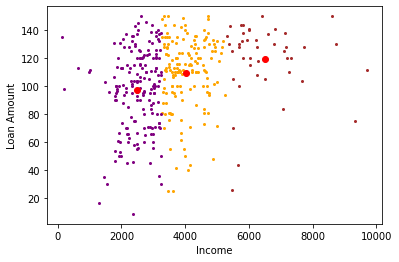

In [ ]:
color=['brown','orange','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k],s=4)
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()